## Texture and Weight Covariance##

I believe that weight covariance (WC), the average correlation between subunits in a DNN, constrains important response properties: translation invariance, texture selectivity (surfaces), and form selectivity (transitions). 

Texture selectivity can be defined as a unit preferring the spatial repetition of certain image structure while form selectivity can be defined as a unit preferring transition in image structure across space. Thus in one case if one take an image statistic measurment for units which prefer textures, for a certain sized window when that window is randomly place around the stimuli that best drive the cell there will be little variation, whereas for a form unit there will be variation but in a specific spatial pattern. Thus if I go from a single patch to one subunit to that patch tiled


In the end I want to be able to understand the relation between WC and these properties so that by measuring them I can infer WC the causal variable in experiments that test these properties.

Here I will come up with a series of more specific null distributions for the ratio of the response to a single image patch vs a tiling of that image patch which takes into account these variables:

I will start with the assumption that all subunits are independent of each other



The response of each subunit is the dot product of the subunits weights $\vec{W}$ with the inputs of the image $\vec{I}$. Then we place this same input in front of all subunits, then we add up all the subunits responses for the total response. Since these are all dot-products the overall response is a function of the amplitude of the input, the amplitude of the weights, and correlation between them $\tilde{\rho}$. So the response to the one input would be:

$$r_s= |\vec{I}| |\vec{W}_1| \tilde{\rho}_1$$

And the response to the tiled input would be:

$$r_t = \sum_j^n{\vec{I} \vec{W}_j} = |\vec{I}|  \sum_{j=2}^n{|\vec{W}_j| \tilde{\rho}_j} + |\vec{I}| |\vec{W}_1|\tilde{\rho}_1 $$

And so the ratio of tiled response to single patch:

$$\frac{r_t}{r_s}=R=\frac{|\vec{I}|  \sum_{j=2}^n{|\vec{W}_j| \tilde{\rho}_j}}{|\vec{I}| |\vec{W}_1|\tilde{\rho}_1} + 1 = \frac{\sum_{j=2}^n{|\vec{W}_j| \tilde{\rho_j}}}{|\vec{W}_1|\tilde{\rho}_1} +1$$
Further assuming that the filters have the same magnitude:

$$R = \sum_{j=2}^n{\frac{\tilde{\rho}_j}{\tilde{\rho}_1}}+ 1 $$

Further assuming all filters have the same correlation to the input:

$$R = n$$

so naturally if all the filters have the same correlation as the first filter to the inputs then the ratio is equal to  $n$ total number of subunits whereas if all other subunits are uncorrelated then the ratio is 1. One thing to notice is that this does not require all the filters to be strongly correlated with each other.

### How does this ratio of tiled to untiled response relate to weight covariance? ###

$$WC = \frac{\sum_{i \neq j}{\vec{W}_i \vec{W}_j}}{\sum_{i \neq j}{|\vec{W}_i| |\vec{W}_j}|} = \frac{\sum_{i \neq j}{|\vec{W}_i| |\vec{W}_j}| \rho_{i,j}}{\sum_{i \neq j}{|\vec{W}_i| |\vec{W}_j}|}$$




and if we assume all filters have the same length.
$$ \frac{\sum_{i \neq j}{\rho_{i,j}}}{(n^2-n)} = \bar{\rho}$$

and the same correlation:

$$\bar{\rho} = \rho_{i,j}$$

So in some sense I can think of weight covariance as the average correlation between subunits (weighted by the magnitude of the subunits weights). So I have the average correlation between filters and I have the ratio of tiled to untiled as a function of the correlation of each filter to the input, how should these relate?

Lets say I optimize for the center subunit and get the inputs to be perfectly correlated to the filter. Then in this special case $\rho_1 =1$ and $\tilde{\rho_j} = \bar{\rho}$ so subunit 1 is at the center of a cone of the other filter weights.

then the ratio becomes:

$$R = \sum_{j=2}^n{\frac{\tilde{\rho}_j}{\tilde{\rho}_1}}+ 1 =  \sum_{j=2}^n{\frac{\bar{\rho}}{\tilde{\rho}_1}}+ 1 = (n-1) \bar{\rho}  + 1$$


So in this case $R \in \ [2-n, n]$ and the key thing to notice is this is only a function of the correlation to the input 

### Estimating across multiple stimuli###
So in this scenario $\frac{r_t}{r_s} = (n-1) \bar{\rho}  + 1$ which is all to say $r_t= r_s[(n-1) \bar{\rho} + 1]$ a simple linear relationship between $r_t$ and $r_s$. Thus if we collected a bunch of responses to tiled vs untiled in this scenario we should expect a perfect linear relationship, proportional to the correlation between subunits and the number of subunits, fixing the number of subunits as we do in a CNN its purely a function of correlation between subunits or WC.

### Overlapping receptive fields###

What about the cases where the receptive fields are overlapped. In this scenario one cannot present to only a single subunit. Thus the relative difference of presenting stimuli to one vs all becomes smaller. Lets think about this by believing that the response to the input patch is linearly proportional to the area of the input patch. So when we present the patch to one subunit, depending on the overlap between subunits, some portion of the patch is also shown to the other subunits. Lets call this average overlap with adjacenet subunits $O_a$ and with the first subunit $O_1$ where $O_1>=O_a$

So the response to the one patch would be:

$$r_s= O_1|\vec{I}| |\vec{W}_1| \tilde{\rho}_1  + O_a |\vec{I}|  \sum_{j=2}^n{|\vec{W}_j| \tilde{\rho}_j}$$

And the response to the tiled input would be:

$$r_t = O_1 \sum_j^n{\vec{I} \vec{W}_j} = O_1|\vec{I}| |\vec{W}_1|\tilde{\rho}_1 + O_1|\vec{I}|  \sum_{j=2}^n{|\vec{W}_j| \tilde{\rho}_j} $$


And the ratio is:

$$\frac{O_1|\vec{I}| |\vec{W}_1|\tilde{\rho}_1 + O_1|\vec{I}|  \sum_{j=2}^n{|\vec{W}_j| \tilde{\rho}_j}}{O_1|\vec{I}| |\vec{W}_1| \tilde{\rho}_1  + O_a |\vec{I}|  \sum_{j=2}^n{|\vec{W}_j| \tilde{\rho}_j}} $$

Assuming equal Filter weights:

$$\frac{O_1 \tilde{\rho}_1 + O_1 (n-1)\bar{\rho}}{O_1 \tilde{\rho}_1  + O_a (n-1)\bar{\rho}} $$

So if $O_1 = O_a$ we get no change even if the other filters are uncorrelated or perfectly correlated. But this is only the case if the stimuli is small and the RF's are close together. If the stimuli fills the entire center subunit and there is some distance between subunits then this ratio has to be greater than 1. Here there is still some dependence on $\bar{\rho}$ and $\tilde{\rho}$ but we can see how it can be subsumed by overlap.

And assuming perfect correlation to the central :
$$\frac{O_1  + O_1 (n-1)\bar{\rho}}{O_1  + O_a (n-1)\bar{\rho}} $$

The thing to notice here 

So in this scenario $\frac{r_t}{r_s} = \frac{O_1  + O_1 (n-1)\bar{\rho}}{O_1  + O_a (n-1)\bar{\rho}}  $ which is all to say $r_t= r_s[\frac{O_1  + O_1 (n-1)\bar{\rho}}{O_1  + O_a (n-1)\bar{\rho}} ]$ a simple linear relationship between $r_t$ and $r_s$. Thus if we collected a bunch of responses to tiled vs untiled in this scenario we should expect a perfect linear relationship, proportional to the correlation between subunits and the number of subunits, fixing the number of subunits as we do in a CNN its purely a function of correlation between subunits or WC.


### What if the central RF is not perfectly correlated to its input? ###

In this case there is still a relationship between the weight covariance (average correlation between filters), the response to a single patch, and the response to multiple patches. In the extreme case as we saw above there is a simple linear relationship when the correlation of the central filter to the single patch is perfect. But what about when the correlation falls below 1 the relationship becomes more complex. We can imagine the central filter as a vector surrounded by a cone of the vectors representing the other filter channels and that whole ensemble pointing away fro mthe vector which represents the input. If we draw a circle of equal angle around the input which intersects the central filter vector we notice that more vectors are on the outside of the circle thus have lower correlation, so we should expect tiling to drive up responses less proportional to weight covariance when the central filter is not perfectly aligned. 

I expect:

$$R = \frac{(n-1) g(\bar{\rho})}{\tilde{\rho}}  + 1$$

where $0 \leq g(x) \leq x$ and $g(x)$ is montone increasing, so while we might think that if all vectors were as correlated to each other as to the stimuli we would get a ratio of $n$ we should actually expect to get less than n.

To calculate our expectation here we could either use simulation or I think the doubly noncentral F distribution...



$$\frac{O_1|\vec{W}_1|\tilde{\rho}_1 + O_1  \sum_{j=2}^n{|\vec{W}_j| \tilde{\rho}_j}}{O_1 |\vec{W}_1| \tilde{\rho}_1  + O_a  \sum_{j=2}^n{|\vec{W}_j| \tilde{\rho}_j}} $$ 

##Calculating ###

If we think about the receptive field overlap on a line then the overlap is a function of RF radius $R_r$, distance between RF centers $(D)$, and radius of the patch $(P_r)$.

The center subunits fraction length taken by patch $O_d$ in 1-d is simply 

$$O_c = \frac{P_r}{R_r}$$

taking this to two dimensions we can consider rotating this length.

$$O_c = \frac{\pi (P_r)^2 } {\pi (R_r)^2} = (\frac{P_r}{R_r})^2$$

What about the case where the center filter isn't perfectly correlated with its inputs? 

Then it can be helpful to think of each weight vector as composed of draws from an IID normal which is correlated to the normals of the other vectors. In this case the distribution of tiled responses becomes related to the double non-central beta distribution....

What about the case where the filters are not independent but have overlapping receptive fields...
Well we have to think about a couple issues: the pooling rule, translation invariance within the RF of each subunit, and the degree of overlap between receptive fields. We hope that we can factor these independently then include them in the above equation.

Lets assume perfect translation invariance, so that the overlap between two receptive fields with the same power simply doubles the response. In this case having the patch in the center is also driving adjacent subunits, thus we have a new baseline assuming all positive covariance between filters the tiled ratio will as a rule tend to be less.

With a pooling rule that tends to be linear at a distance and complex close by, then with increasing overlap we get more noise in the relationship, and further a better relation.

With no translation invariance you can consider the individual repsonses. Or think about it as noise.

If I have the response of a collection of subunits how can I judge whether they have similar selectivity. One way is to present the same stimuli to one then the other and show their responses are correlated. 

Another way is to compare the response to a stimuli presented to one and then both subunits and to show, given linear pooling, the correlation between both conditions


### what does the tiling ratio tell you? ###
it tells you about the true correlation of the stimuli to the cell. Something can give its max response even if its not well correlated. Its preferred image is not an actual image.

It would like a repetition of clear dog faces with shifts only as as wide as the dogs nose. What would an impossible image look like.

### What about dense tiling?###


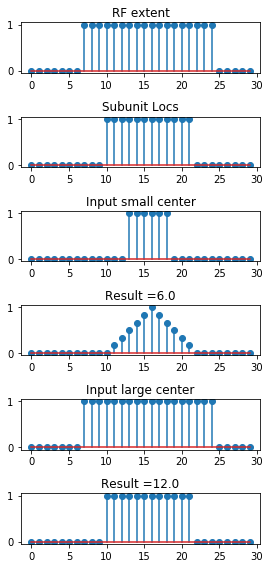

In [20]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
tot_rf = 18
sub_rf = 6
rf_side = np.floor(sub_rf/2.)
in_im_s = 30
input_im = np.zeros(in_im_s)
start_rf = 7

thirds = tot_rf/3.

rf = np.ones(sub_rf)/sub_rf
rf_inds = np.arange(start_rf, start_rf + tot_rf ).astype(int)
sub_inds = np.arange(start_rf+rf_side, start_rf+tot_rf-rf_side).astype(int)
input_1_inds = np.arange(thirds + start_rf, tot_rf + start_rf - thirds).astype(int) 


plt.figure(figsize=(4,8));
plt.subplot(611)
rf_loc =  np.zeros(in_im_s);
rf_loc[rf_inds] = 1
plt.stem(rf_loc);
plt.title('RF extent');

plt.subplot(612)
rf_subunit_locs = np.zeros(in_im_s);
rf_subunit_locs[sub_inds] = 1
plt.stem(rf_subunit_locs);
plt.title('Subunit Locs');

plt.subplot(613)
input_im = np.zeros(in_im_s);
input_im[input_1_inds] = 1
plt.stem(input_im)
plt.title('Input small center')

plt.subplot(614)
res = np.convolve(rf, input_im, 'same');
plt.stem(res*rf_subunit_locs);
plt.title('Result =' + str(sum(res*rf_subunit_locs)))

plt.subplot(615)
input_im = np.zeros(in_im_s);
input_im[rf_inds] = 1
plt.stem(input_im)
plt.title('Input large center')

plt.subplot(616)
res = np.convolve(rf, input_im, 'same');

plt.stem(res*rf_subunit_locs);
plt.title('Result =' + str(sum(res*rf_subunit_locs)))

plt.tight_layout()

In the first figure the extent of the RF is indicated.
The second the location of the subunits is indicated.
In the third we have an input that takes up a third of the center of the receptive field. 
Then we see the responses of each subunit.
Then we try a large input where we triple the area.
Then we see the responses of the subunits which is not a total tripling of the response.

In the case of dense overlap we are essentially dealing with why the edges of the RF would drop off even if weights on all subunits were the same. 
Generally as the subunits RF's get larger the ratio of non-tiled to tiled goes up.

The best response you can get is the number of subunits*subunit width